Usual setup:

In [1]:
from google.colab import drive
drive.mount("/content/drive")
%cd /content/drive/MyDrive/HEDSpython

Mounted at /content/drive
/content/drive/MyDrive/HEDSpython


#**Supervised Learning - Linear Regression**

Linear regression the simplest and most commonly used statitical method for predictive analysis and machine learning.

Linear regression predicts the value of a variable given the value of other variables assuming that the relationhsip between the outcome variable and the predictors is linear. 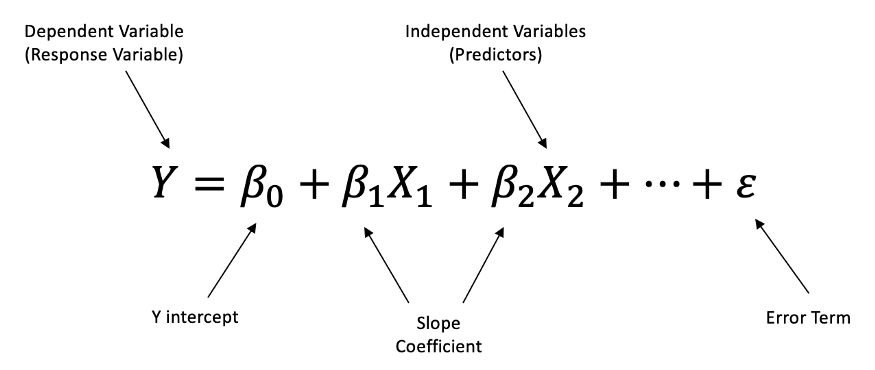

Image from: https://medium.com/swlh/understanding-multiple-linear-regression-e0a93327e960.

Let's import our libraries.

In [82]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

Then upload and explore our data.

In [23]:
filePath = 'files/weatherHistory.csv'
weather = pd.read_csv(filePath)

In [24]:
weather.head(10)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.


In [25]:
weather.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


Now let's create a subset for the dataframe with the following features:

1. Summary
2. Humidity
3. Apparent Temperature (C)



In [41]:
temp = weather[["Humidity"]]
temp.head(10)

,Humidity
0,0.89
1,0.86
2,0.89
3,0.83
4,0.83
5,0.85
6,0.95
7,0.89
8,0.82
9,0.72


Convert the categorical variable (Summary) into an indicator variable.

In [42]:
dummies = pd.get_dummies(weather["Summary"])
dummies.head(12)

,Breezy,Breezy and Dry,Breezy and Foggy,Breezy and Mostly Cloudy,Breezy and Overcast,Breezy and Partly Cloudy,Clear,Dangerously Windy and Partly Cloudy,Drizzle,Dry,...,Mostly Cloudy,Overcast,Partly Cloudy,Rain,Windy,Windy and Dry,Windy and Foggy,Windy and Mostly Cloudy,Windy and Overcast,Windy and Partly Cloudy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


Concatenate the two datasets `temp1` and `dummies` to create a single dataframe `X`.

In [43]:
X = pd.concat([temp,dummies],axis=1)
X.head(12)

,Humidity,Breezy,Breezy and Dry,Breezy and Foggy,Breezy and Mostly Cloudy,Breezy and Overcast,Breezy and Partly Cloudy,Clear,Dangerously Windy and Partly Cloudy,Drizzle,...,Mostly Cloudy,Overcast,Partly Cloudy,Rain,Windy,Windy and Dry,Windy and Foggy,Windy and Mostly Cloudy,Windy and Overcast,Windy and Partly Cloudy
0,0.89,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0.86,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0.89,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0.83,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0.83,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,0.85,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6,0.95,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7,0.89,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8,0.82,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9,0.72,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


Let's take a look at the columns in our dataset

In [44]:
number = 0
for col in X.columns:
  number += 1
  print('Column Name ', number, ':', col)

Column Name  1 : Humidity
Column Name  2 : Breezy
Column Name  3 : Breezy and Dry
Column Name  4 : Breezy and Foggy
Column Name  5 : Breezy and Mostly Cloudy
Column Name  6 : Breezy and Overcast
Column Name  7 : Breezy and Partly Cloudy
Column Name  8 : Clear
Column Name  9 : Dangerously Windy and Partly Cloudy
Column Name  10 : Drizzle
Column Name  11 : Dry
Column Name  12 : Dry and Mostly Cloudy
Column Name  13 : Dry and Partly Cloudy
Column Name  14 : Foggy
Column Name  15 : Humid and Mostly Cloudy
Column Name  16 : Humid and Overcast
Column Name  17 : Humid and Partly Cloudy
Column Name  18 : Light Rain
Column Name  19 : Mostly Cloudy
Column Name  20 : Overcast
Column Name  21 : Partly Cloudy
Column Name  22 : Rain
Column Name  23 : Windy
Column Name  24 : Windy and Dry
Column Name  25 : Windy and Foggy
Column Name  26 : Windy and Mostly Cloudy
Column Name  27 : Windy and Overcast
Column Name  28 : Windy and Partly Cloudy


Select the variable you want to predict (y).

In [45]:
y = weather["Apparent Temperature (C)"]

Split the datasets into Training and Testing (conventionally we use 30% for testing & 80% for training but you can do the split differently too)
 1. Training dataset (X_train, y_train) --> These datasets are used to fit the regression model
 2. Testing  dataset (X_test, y_test)   --> **X_test** is used to predict the dependent variable, while **y_test** is used to evaluate the confidence of the model

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

Let's fit the regression model using the functions `LinearRegression()`
and `fit()`.

In [52]:
regressionModel = LinearRegression()
regressionModel.fit(X_train, y_train)

LinearRegression()

Now we can use the fitted model to predict the y values in our X_test dataset.

In [86]:
y_prediction= regressionModel.predict(X_test)

We can now look at how the predicted values do against the true values in y_test.

In [57]:
result = pd.DataFrame(y_test)
result["y_predict"] = y_prediction
print(result.head(20))

       Apparent Temperature (C)  y_predict
87160                 27.777778  18.044671
24966                  7.133333   0.384515
86284                  3.411111   3.227598
33090                  7.122222  -1.326660
73435                 -8.694444  -0.471072
59789                  3.511111   5.414443
56049                  4.822222   7.777620
40381                  6.438889  23.096585
60537                 14.822222   9.977576
9641                  28.700000  23.748588
56871                 33.961111  26.518936
11134                  0.983333   5.625665
34868                 17.688889  13.040758
36601                 -2.455556   5.210858
52124                 25.455556  20.244627
53528                 22.061111  19.389039
95786                 19.022222   9.488795
79534                 -0.044444  16.618692
65169                 22.150000  15.477908
11725                 12.177778   9.773991


And plot the predictions of our model (blue) over the true data points (black).

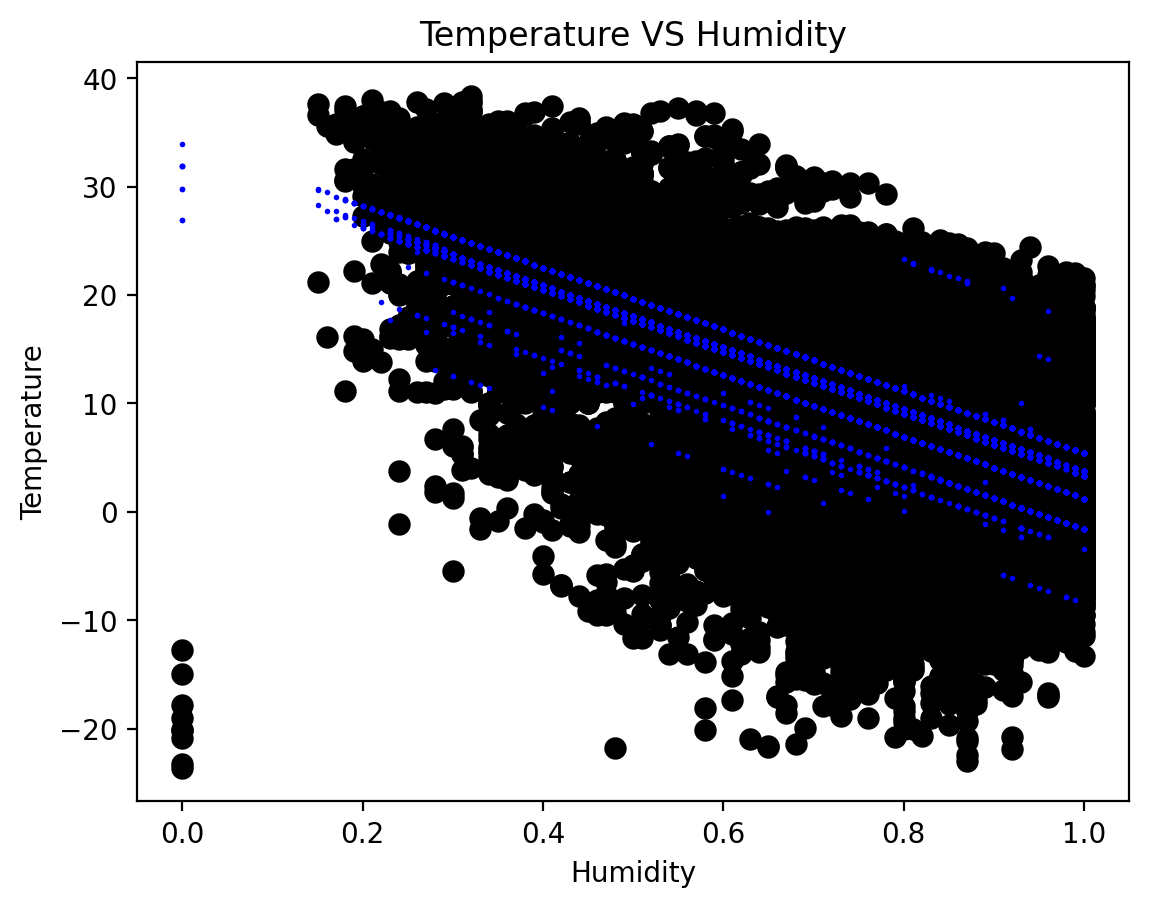

In [56]:
plt.figure(dpi=200)
plt.scatter(X_test["Humidity"], y_test, color='black', s=50)
plt.scatter(X_test["Humidity"], y_prediction , color='blue', s=1)
plt.title('Temperature VS Humidity')
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.show()

We can see that the model reflects a similar downward trend although it does not represent a perfect fit for the data.

Another metric of accuracy is the **R-squared**. The **R-squared** is measured the proportion of variance in the dependent variable that can be explained by the independent variable.

A good R-squared is above 0.7.

In [117]:
R_squared = regressionModel.score(X_test,y_test)
print('R_squared', R_squared)

R_squared 0.7670218843587764


##**Exercise 2**

Let's now look at the relationship between Max and Min temperature.

In [100]:
filePath = 'files/weather.csv'
weather = pd.read_csv(filePath)

<ipython-input-100-096a48597fa4>:2: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  weather = pd.read_csv(filePath)


In [101]:
weather.head(10)

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,10001,1942-7-6,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10001,1942-7-7,T,NaN,28.333333,22.777778,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,10001,1942-7-8,3.556,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,10001,1942-7-9,T,NaN,27.222222,22.777778,25.000000,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10001,1942-7-10,3.556,NaN,25.555556,21.666667,23.333333,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
weather.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,...,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,...,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,...,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,...,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,...,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,...,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,...,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


In [104]:
number = 0
for col in weather.columns:
  number += 1
  print('Column Name ', number, ':', col)

Column Name  1 : STA
Column Name  2 : Date
Column Name  3 : Precip
Column Name  4 : WindGustSpd
Column Name  5 : MaxTemp
Column Name  6 : MinTemp
Column Name  7 : MeanTemp
Column Name  8 : Snowfall
Column Name  9 : PoorWeather
Column Name  10 : YR
Column Name  11 : MO
Column Name  12 : DA
Column Name  13 : PRCP
Column Name  14 : DR
Column Name  15 : SPD
Column Name  16 : MAX
Column Name  17 : MIN
Column Name  18 : MEA
Column Name  19 : SNF
Column Name  20 : SND
Column Name  21 : FT
Column Name  22 : FB
Column Name  23 : FTI
Column Name  24 : ITH
Column Name  25 : PGT
Column Name  26 : TSHDSBRSGF
Column Name  27 : SD3
Column Name  28 : RHX
Column Name  29 : RHN
Column Name  30 : RVG
Column Name  31 : WTE


We select our variables of interest.

In [109]:
X = weather['MinTemp']
y = weather['MaxTemp']

Let's take a look at their shape.

In [110]:
print(X.shape)
print(y.shape)

(119040,)
(119040,)


They are 1D array. We need to convert these two dataset from 1D array into 2D array using `shape()` function.

In [111]:
X = X.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)

Split the datasets into Training and Testing.

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

Fit the Regression Model.

In [113]:
regressionModel = LinearRegression()
regressionModel.fit(X_train, y_train)

LinearRegression()

Make predictions.

In [114]:
y_prediction = regressionModel.predict(X_test)

Evaluate the model.

In [120]:
R_squared = regressionModel.score(X_test,y_test)
print('R-squared:', R_squared)

R-squared: 0.7670218843587764


It seems to be doing pretty well!

Plot the regression model.

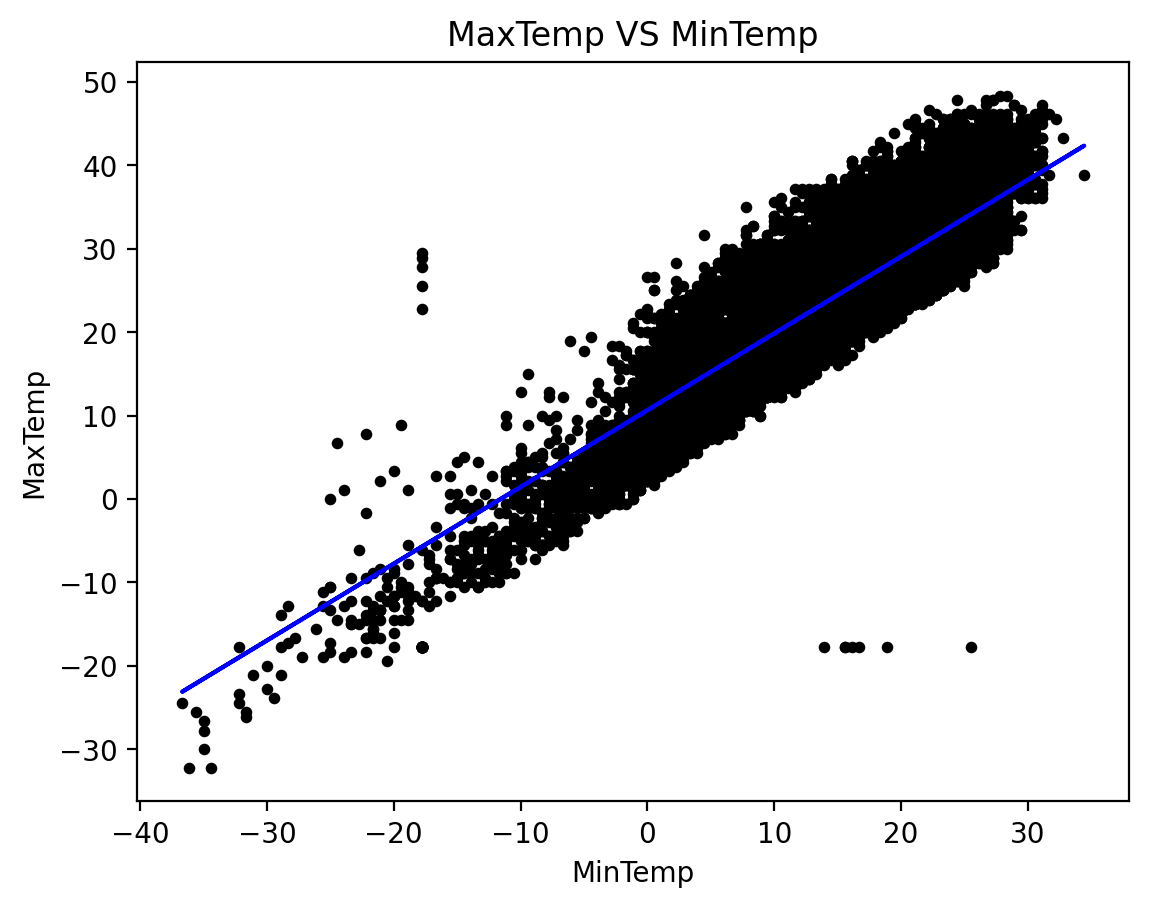

In [121]:
plt.figure(dpi=200)
plt.scatter(X_test, y_test, color='black', s=10)
plt.plot(X_test, regressionModel.predict(X_test), color='blue')
plt.title('MaxTemp VS MinTemp')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()

Plot predicted vs measured values.

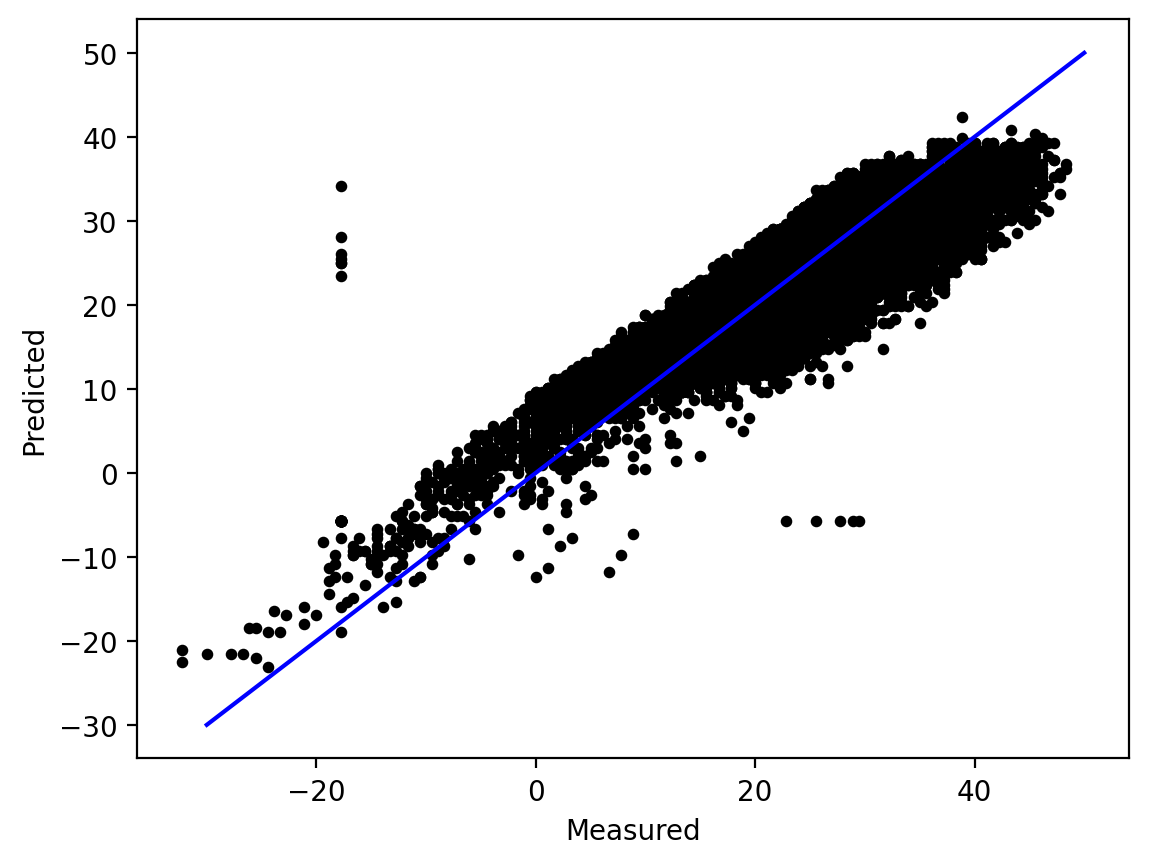

In [130]:
plt.figure(dpi=200)
plt.scatter(y_test, regressionModel.predict(X_test), color='black', s=10)
plt.plot([-30, 50], [-30, 50], color='blue')
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.show()

What will be the maximum temp when the minimum temp is 25 C° according to our model?

In [129]:
y_pred_25 = regressionModel.predict([[25]])
print(y_pred_25)

[[33.67035117]]
